In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graspy
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt; plt.style.use('classic')
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [24]:
male = np.array(pd.read_csv('../0306/male_chem_A_full_undirected.csv', header=None).values)
herm = np.array(pd.read_csv('../0306/herm_chem_A_full_undirected.csv', header=None).values)

In [25]:
print('male:',male.shape)
print('herm:',herm.shape)

male: (575, 575)
herm: (453, 453)


From earlier, we saw that the first 0-50x0-50 block as well as the 350-400x350-400 block were similar.

So, let's grow out from those and see how the p-value changes

In [26]:
growlist = []
for x in range(50,201,20):
    nonpar = graspy.inference.NonparametricTest()
    m = male[0:x,0:x]
    h = herm[0:x,0:x]
    p = nonpar.fit(m,h)
    growlist.append(p)

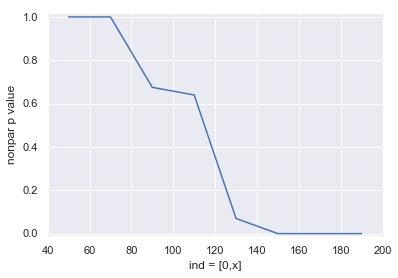

In [45]:
plt.plot(range(50,201,20), growlist)
plt.ylabel('nonpar p value')
plt.ylim([-0.01,1.02])
plt.xlabel('ind = [0,x]')
plt.savefig('seed1.png')

In [28]:
growlist2 = []
for x in range(0,50,10):
    nonpar = graspy.inference.NonparametricTest()
    m = male[350-x:400+x,350-x:400+x]
    h = herm[350-x:400+x,350-x:400+x]
    p = nonpar.fit(m,h)
    growlist2.append(p)

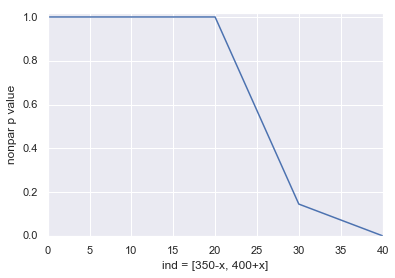

In [44]:
plt.plot(range(0,50,10), growlist2)
plt.ylim([0,1.02])
plt.ylabel('nonpar p value')
plt.xlabel('ind = [350-x, 400+x]')
plt.savefig('seed2.png')
plt.show()

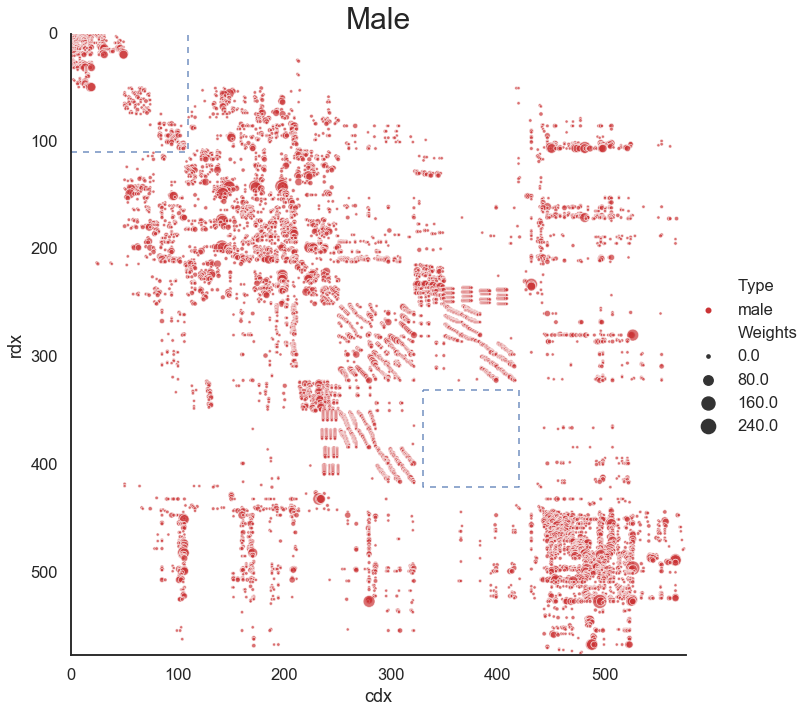

In [65]:
graspy.plot.gridplot([male], ['male'])
plt.axis('on')
plt.title('Male', fontsize=30)
plt.plot([0,110,110],[110,110,0],'b--',alpha=0.8)
plt.plot([330,420,420,330,330],[330,330,420,420,330],'b--',alpha=0.8)
plt.savefig('male.png')

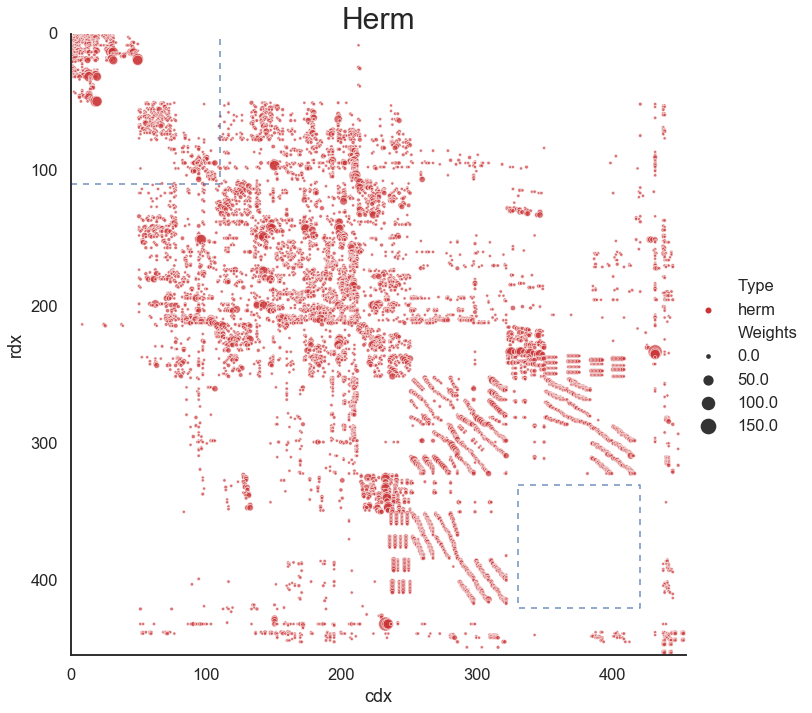

In [64]:
graspy.plot.gridplot([herm], ['herm'])
plt.axis('on')
plt.title('Herm', fontsize=30)
plt.plot([0,110,110],[110,110,0],'b--',alpha=0.8)
plt.plot([330,420,420,330,330],[330,330,420,420,330],'b--',alpha=0.8)
plt.savefig('herm.png')